In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
df = pd.read_csv('data/output/DWData-WorldCup2018-DWScoreFinals.csv')

In [3]:
df.head()

,Team,#,Pos.,Player,Alias,HAS_PLAYED,Club,League,CountryCode
0,Belgium,1,GK,COURTOIS Thibaut,COURTOIS,True,Chelsea FC,Premier League,ENG
1,Belgium,2,DF,ALDERWEIRELD Toby,ALDERWEIRELD,True,Tottenham Hotspur FC,Premier League,ENG
2,Belgium,3,DF,VERMAELEN Thomas,VERMAELEN,True,FC Barcelona,Primera Division,ESP
3,Belgium,4,DF,KOMPANY Vincent,KOMPANY,True,Manchester City FC,Premier League,ENG
4,Belgium,5,DF,VERTONGHEN Jan,VERTONGHEN,True,Tottenham Hotspur FC,Premier League,ENG


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
Team           92 non-null object
#              92 non-null int64
Pos.           92 non-null object
Player         92 non-null object
Alias          92 non-null object
HAS_PLAYED     92 non-null bool
Club           92 non-null object
League         92 non-null object
CountryCode    92 non-null object
dtypes: bool(1), int64(1), object(7)
memory usage: 5.9+ KB


In [5]:
played = df[df['HAS_PLAYED']==True]
played.head()

,Team,#,Pos.,Player,Alias,HAS_PLAYED,Club,League,CountryCode
0,Belgium,1,GK,COURTOIS Thibaut,COURTOIS,True,Chelsea FC,Premier League,ENG
1,Belgium,2,DF,ALDERWEIRELD Toby,ALDERWEIRELD,True,Tottenham Hotspur FC,Premier League,ENG
2,Belgium,3,DF,VERMAELEN Thomas,VERMAELEN,True,FC Barcelona,Primera Division,ESP
3,Belgium,4,DF,KOMPANY Vincent,KOMPANY,True,Manchester City FC,Premier League,ENG
4,Belgium,5,DF,VERTONGHEN Jan,VERTONGHEN,True,Tottenham Hotspur FC,Premier League,ENG


## List of national teams

In [6]:
len(played['Team'].value_counts())

4

In [7]:
played['Team'].value_counts()

France     15
England    14
Belgium    14
Croatia    13
Name: Team, dtype: int64

## List of Leagues

In [8]:
played['League_ID'] = played['CountryCode'] +" - "+played['League']

/Users/gcg/.virtualenvs/ddj/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
played['League_ID'].value_counts()

ENG - Premier League      28
ESP - Primera Division    10
ITA - Serie A              6
FRA - Ligue 1              5
GER - Bundesliga           5
CHN - Super League         1
TUR - Süper Lig            1
Name: League_ID, dtype: int64

## How many different leagues are represented among the players of the 2018 WorldCup?

In [10]:
len(played['League_ID'].value_counts())

7

## How many different leagues are represented in each national team?

In [11]:
played.groupby(by='Team')['League_ID'].nunique().sort_values(ascending = True)

Team
England    1
Belgium    5
France     5
Croatia    6
Name: League_ID, dtype: int64

## (a) How many players of each league play in each national team?

In [12]:
played.groupby(by='Team')['League_ID'].value_counts()

Team     League_ID             
Belgium  ENG - Premier League       9
         FRA - Ligue 1              2
         CHN - Super League         1
         ESP - Primera Division     1
         ITA - Serie A              1
Croatia  ITA - Serie A              4
         ESP - Primera Division     3
         GER - Bundesliga           3
         ENG - Premier League       1
         FRA - Ligue 1              1
         TUR - Süper Lig            1
England  ENG - Premier League      14
France   ESP - Primera Division     6
         ENG - Premier League       4
         FRA - Ligue 1              2
         GER - Bundesliga           2
         ITA - Serie A              1
Name: League_ID, dtype: int64

In [ ]:
played.groupby(by='Team')['League_ID'].value_counts()

## (b) How many players are in each national team?

In [13]:
played.groupby(by='Team')['Player'].nunique()

Team
Belgium    14
Croatia    13
England    14
France     15
Name: Player, dtype: int64

## (c) How many players has each league sent to a World Cup team?

In [14]:
played['League_ID'].value_counts()

ENG - Premier League      28
ESP - Primera Division    10
ITA - Serie A              6
FRA - Ligue 1              5
GER - Bundesliga           5
CHN - Super League         1
TUR - Süper Lig            1
Name: League_ID, dtype: int64

## VISUALIZING

In [3]:
score = pd.read_csv('data/output/DWData-DWScore-All-matches.csv')
score

,R Group Stage,Association,League,Group stage,Round of 16,Quarter Finals,SemiFinals,Finals,Sum of all stages,R all stages
0,1,UEFA,ENG - Premier League,1758.96,127.30,70.27,10.57,25.47,1992.56,1
1,2,UEFA,ESP - Primera Division,1155.28,57.14,16.10,5.66,4.71,1238.89,2
2,5,UEFA,GER - Bundesliga,563.28,9.32,1.93,1.38,0.67,576.58,3
3,4,UEFA,ITA - Serie A,425.96,24.22,3.47,2.83,0.83,457.31,4
4,3,UEFA,FRA - Ligue 1,256.17,10.73,2.82,0.28,1.38,271.37,5
5,8,UEFA,RUS - Premjer-Liga,197.30,18.30,1.13,0.07,NaN,216.80,6
6,9,CONCACAF,MEX - Primera Division,75.34,0.50,0.00,NaN,NaN,75.84,7
7,10,AFC,KSA - Saudi Professional League,66.76,NaN,NaN,NaN,NaN,66.76,8
8,7,UEFA,TUR - Süper Lig,44.69,0.83,0.13,0.07,0.00,45.72,9
9,11,UEFA,POR - Primeira Liga,42.44,0.00,NaN,NaN,NaN,42.44,10


In [4]:
import seaborn as sns

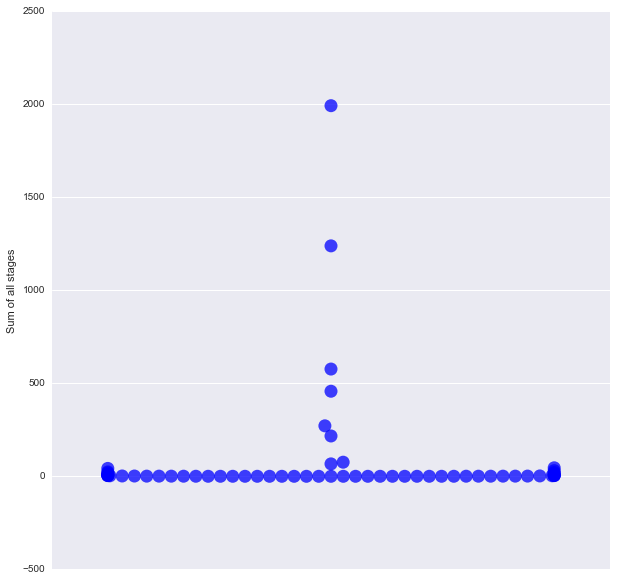

In [7]:
data_selection = score

fig, ax = plt.subplots(figsize = (10,10))
sns.swarmplot(y="Sum of all stages", data=data_selection, color="blue", alpha=.75, s=13)
# plt.savefig('visuals/drafts/dw-score-2018-all-matches.pdf', transparent = True)
